In [1]:
import pandas as pd
import matplotlib.pyplot as plt

from utils.dataset_tools import DatasetTools


2025-10-06 21:56:34.192482: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1759780594.284464   45386 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1759780594.309306   45386 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1759780594.449153   45386 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1759780594.449179   45386 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1759780594.449182   45386 computation_placer.cc:177] computation placer alr

In [2]:
df = pd.read_csv("larger_full_datasets.csv")
df.head()

,sample_id,frame,label,landmark_1_x,landmark_1_y,landmark_1_z,landmark_2_x,landmark_2_y,landmark_2_z,landmark_3_x,...,landmark_18_z,landmark_19_x,landmark_19_y,landmark_19_z,landmark_20_x,landmark_20_y,landmark_20_z,landmark_21_x,landmark_21_y,landmark_21_z
0,1,0,A,0.345417,0.648431,-1.125724e-07,0.363545,0.620765,-0.010274,0.367171,...,-0.003865,0.321722,0.551512,-0.008457,0.326903,0.565844,-0.005724,0.329682,0.577548,-0.001789
1,1,1,A,0.366266,0.597102,-9.622672e-08,0.391580,0.578109,-0.012907,0.406190,...,0.000685,0.356418,0.497935,-0.004451,0.361665,0.515749,-0.001988,0.363353,0.523833,0.002337
2,1,2,A,0.400966,0.572690,-1.089629e-07,0.424555,0.552354,-0.004017,0.439723,...,-0.004296,0.383425,0.481909,-0.009304,0.389207,0.502081,-0.005430,0.391897,0.513775,-0.000924
3,1,3,A,0.418257,0.573744,-1.190043e-07,0.441344,0.563031,-0.007786,0.460869,...,-0.002903,0.402536,0.489501,-0.009669,0.406139,0.510639,-0.006567,0.409394,0.523706,-0.001918
4,1,4,A,0.431913,0.582072,-1.241054e-07,0.453692,0.577044,-0.009167,0.474907,...,-0.004793,0.417201,0.501486,-0.012369,0.419653,0.524298,-0.008715,0.422120,0.535854,-0.003439


In [3]:
df.dtypes

sample_id          int64
frame              int64
label             object
landmark_1_x     float64
landmark_1_y     float64
                  ...   
landmark_20_y    float64
landmark_20_z    float64
landmark_21_x    float64
landmark_21_y    float64
landmark_21_z    float64
Length: 66, dtype: object

In [4]:
df.shape

(110043, 66)

In [5]:
df['label'].unique()

array(['A', 'A_A', 'B', 'C', 'C_C', 'CZ', 'CH', 'D', 'E', 'E_E', 'F', 'G',
       'H', 'I', 'J', 'K', 'L', 'L_L', 'M', 'N', 'O', 'O_O', 'P', 'R',
       'RZ', 'S', 'S_S', 'SZ', 'T', 'U', 'W', 'Z', 'Z_Z', 'Z_X', 'N_N',
       'Y'], dtype=object)

In [6]:
df['label'].count()

110043

In [7]:
df.isnull().sum()

sample_id        0
frame            0
label            0
landmark_1_x     0
landmark_1_y     0
                ..
landmark_20_y    0
landmark_20_z    0
landmark_21_x    0
landmark_21_y    0
landmark_21_z    0
Length: 66, dtype: int64

In [8]:
# Policzenie liczby unikalnych nagrań (sample_id) dla każdej klasy gestu
gesture_counts_original = df.groupby("label")["sample_id"].nunique()

print("Liczba nagranych gestów (przed podziałem na sekwencje):")
for label, count in gesture_counts_original.items():
    print(f"{label}: {count} nagrań")


Liczba nagranych gestów (przed podziałem na sekwencje):
A: 81 nagrań
A_A: 81 nagrań
B: 82 nagrań
C: 82 nagrań
CH: 80 nagrań
CZ: 81 nagrań
C_C: 82 nagrań
D: 82 nagrań
E: 73 nagrań
E_E: 82 nagrań
F: 82 nagrań
G: 82 nagrań
H: 82 nagrań
I: 82 nagrań
J: 82 nagrań
K: 82 nagrań
L: 82 nagrań
L_L: 82 nagrań
M: 82 nagrań
N: 81 nagrań
N_N: 82 nagrań
O: 82 nagrań
O_O: 82 nagrań
P: 82 nagrań
R: 83 nagrań
RZ: 81 nagrań
S: 82 nagrań
SZ: 80 nagrań
S_S: 82 nagrań
T: 82 nagrań
U: 82 nagrań
W: 82 nagrań
Y: 82 nagrań
Z: 91 nagrań
Z_X: 83 nagrań
Z_Z: 83 nagrań


In [10]:
roznica = gesture_counts_original.max() - gesture_counts_original.min()
print(f"Różnica między największą a najmniejszą liczbą nagrań: {roznica}")
print(f"Min: {gesture_counts_original.min()}")
print(f"Min: {gesture_counts_original.max()}")


Różnica między największą a najmniejszą liczbą nagrań: 18
Min: 73
Min: 91


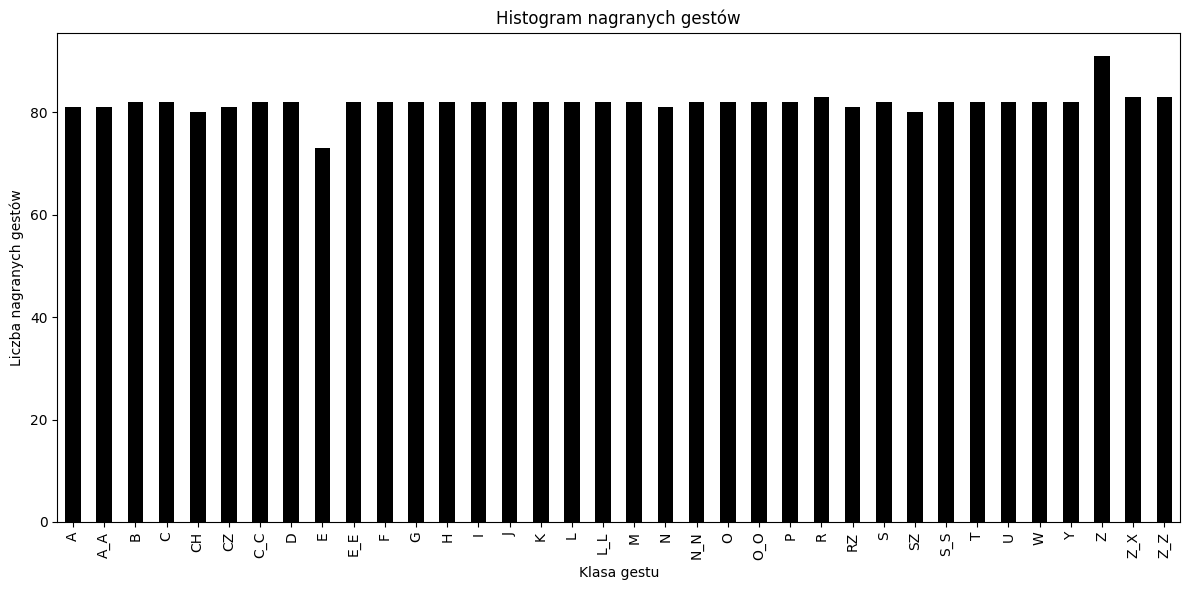

In [10]:
import matplotlib.pyplot as plt

# Liczba nagranych gestów (unikalne sample_id na klasę)
gesture_counts_original = df.groupby("label")["sample_id"].nunique()

# Histogram
plt.figure(figsize=(12,6))
gesture_counts_original.plot(kind="bar", color="black")

plt.title("Histogram nagranych gestów", color="black")
plt.xlabel("Klasa gestu")
plt.ylabel("Liczba nagranych gestów")
plt.xticks(rotation=90, color="black")
plt.yticks(color="black")
plt.tight_layout()
plt.show()


In [ ]:
import pandas as pd
import numpy as np
from collections import Counter

# Wczytanie danych
DATASET_PATH = '../dataset/larger_full_datasets.csv'
df = pd.read_csv(DATASET_PATH)

# Podział na sekwencje
sequences, labels = DatasetTools.divide_into_sequences(df)

print(f"Liczba sekwencji w dataset: {len(sequences)}")
print(f"Przykładowy kształt pojedynczej sekwencji: {sequences[0].shape}")


In [ ]:
import numpy as np
from collections import Counter

# labels – tablica etykiet sekwencji
label_counts = Counter(labels)

print("Liczba sekwencji (gestów) na klasę:")
for label, count in label_counts.items():
    print(f"{label}: {count}")


In [ ]:
import matplotlib.pyplot as plt

labels_list = list(label_counts.keys())
counts_list = list(label_counts.values())

plt.figure(figsize=(10,5))
plt.bar(labels_list, counts_list, color='black')
plt.xlabel("Etykieta gestu")
plt.ylabel("Liczba sekwencji (gestów)")
plt.title("Rozkład liczby gestów na klasę")
plt.xticks(rotation=45)
plt.show()


In [ ]:
frame_counts = df['label'].value_counts().sort_index()
# Przeliczenie na gesty (zakładając 30 klatek = 1 gest)
gesture_counts = (frame_counts / 30).astype(int)

plt.figure(figsize=(10,6))
gesture_counts.plot(kind='bar', color='black')
plt.title("Histogram klas gestów", color='black')
plt.xlabel("Klasa gestu")
plt.ylabel("Liczba gestów (sekwencji)")
plt.xticks(rotation=90, color='black')
plt.yticks(color='black')
plt.tight_layout()
plt.show()
